In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statistics 
from collections import Counter
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as sk
from scipy.stats import zscore
import jenkspy
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz,plot_tree
from sklearn import tree
from sklearn.naive_bayes import MultinomialNB
import statsmodels.tools.tools as stattools
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier

## Q1:

In [2]:
vehicle=pd.read_csv('vehicle.csv')
vehicle

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39,87,183,64,8,169,40,20,134,200,422,149,72,7,25,188,195,saab
842,89,46,84,163,66,11,159,43,20,159,173,368,176,72,1,20,186,197,van
843,106,54,101,222,67,12,222,30,25,173,228,721,200,70,3,4,187,201,saab
844,86,36,78,146,58,7,135,50,18,124,155,270,148,66,0,25,190,195,saab


In [3]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [4]:
veh_col=vehicle.columns
for c in veh_col:
    ser2 = vehicle[c]
    #pd.to_numeric(ser2).plot(kind='hist', stacked = True) 
    if c=='Class':
        continue
    print('sum of Zeros in {} column:\n'.format(c),ser2.eq(0).sum())

sum of Zeros in COMPACTNESS column:
 0
sum of Zeros in CIRCULARITY column:
 0
sum of Zeros in DISTANCE_CIRCULARITY column:
 0
sum of Zeros in RADIUS_RATIO column:
 0
sum of Zeros in PR.AXIS_ASPECT_RATIO column:
 0
sum of Zeros in MAX.LENGTH_ASPECT_RATIO column:
 0
sum of Zeros in SCATTER_RATIO column:
 0
sum of Zeros in ELONGATEDNESS column:
 0
sum of Zeros in PR.AXIS_RECTANGULARITY column:
 0
sum of Zeros in MAX.LENGTH_RECTANGULARITY column:
 0
sum of Zeros in SCALED_VARIANCE_MAJOR column:
 0
sum of Zeros in SCALED_VARIANCE_MINOR column:
 0
sum of Zeros in SCALED_RADIUS_OF_GYRATION column:
 0
sum of Zeros in SKEWNESS_ABOUT_MAJOR column:
 0
sum of Zeros in SKEWNESS_ABOUT_MINOR column:
 77
sum of Zeros in KURTOSIS_ABOUT_MAJOR column:
 30
sum of Zeros in KURTOSIS_ABOUT_MINOR column:
 0
sum of Zeros in HOLLOWS_RATIO column:
 0


im not sure but i think those zeros are allowed in this data base.

In [5]:
vehicle["Class"].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

Class column has no missing data. all are actual data

In [6]:
# X_class_ind = np.array(vehicle['Class'])
# (X_class_ind , X_class_ind_dict) = stattools.categorical(X_class_ind,drop=True, dictnames = True)
# X_class_ind = pd.DataFrame(X_class_ind)
# X_class_ind

In [7]:
# vehicle=vehicle.drop(["Class"],axis=1)
# vehicle= pd.concat((vehicle,X_class_ind), axis = 1)
# vehicle

In [8]:
veh_col=vehicle.columns
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   COMPACTNESS                846 non-null    int64 
 1   CIRCULARITY                846 non-null    int64 
 2   DISTANCE_CIRCULARITY       846 non-null    int64 
 3   RADIUS_RATIO               846 non-null    int64 
 4   PR.AXIS_ASPECT_RATIO       846 non-null    int64 
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    int64 
 6   SCATTER_RATIO              846 non-null    int64 
 7   ELONGATEDNESS              846 non-null    int64 
 8   PR.AXIS_RECTANGULARITY     846 non-null    int64 
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    int64 
 10  SCALED_VARIANCE_MAJOR      846 non-null    int64 
 11  SCALED_VARIANCE_MINOR      846 non-null    int64 
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    int64 
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    int64 
 14  SKEWNESS_A

In [9]:
# print("value_counts of 0: \n",vehicle[0].value_counts(),
#      "\nvalue_counts of 1: \n",vehicle[1].value_counts(),
#      "\nvalue_counts of 2: \n",vehicle[2].value_counts(),
#      "\nvalue_counts of 3: \n",vehicle[3].value_counts())

In [10]:
# vehicle=vehicle.rename(columns={0: "bus", 2: "saab" , 1:"opel" , 3: "van"})
# vehicle

In [11]:
vehicle_norm=vehicle.copy()
veh_y=vehicle_norm["Class"]
vehicle_norm=vehicle_norm.drop(["Class"],axis=1)
veh_col=vehicle_norm.columns
veh_col
vehicle_norm=vehicle_norm.to_numpy()
vehicle_norm

array([[ 95,  48,  83, ...,  16, 187, 197],
       [ 91,  41,  84, ...,  14, 189, 199],
       [104,  50, 106, ...,   9, 188, 196],
       ...,
       [106,  54, 101, ...,   4, 187, 201],
       [ 86,  36,  78, ...,  25, 190, 195],
       [ 85,  36,  66, ...,  18, 186, 190]], dtype=int64)

In [12]:
scaler = sk.StandardScaler()
vehicle_norm=scaler.fit_transform(vehicle_norm)
vehicle_norm=pd.DataFrame(vehicle_norm,columns=veh_col)
vehicle_norm= pd.concat((vehicle_norm,veh_y), axis = 1)
vehicle_norm["Class"]=vehicle_norm["Class"].replace({"bus":0 , "opel": 1 , "saab" : 2 , "van": 3})
vehicle_norm

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,0.160580,0.508950,0.057819,0.270806,1.307291,0.311542,-0.205844,0.136570,-0.224944,0.758332,-0.402383,-0.344935,0.285812,-0.329056,-0.076711,0.380991,-0.313722,0.183957,3
1,-0.325470,-0.626268,0.121261,-0.835244,-0.595396,0.094079,-0.597112,0.520843,-0.610954,-0.344578,-0.593611,-0.622416,-0.513517,-0.061767,0.533610,0.156925,0.010937,0.452977,3
2,1.254193,0.833298,1.517005,1.197496,0.546217,0.311542,1.148544,-1.144341,0.933086,0.689401,1.095564,1.104766,1.392577,0.071877,1.550812,-0.403238,-0.151393,0.049447,2
3,-0.082445,-0.626268,-0.005624,-0.297166,0.165679,0.094079,-0.747600,0.648935,-0.610954,-0.344578,-0.912323,-0.741337,-1.466565,-1.264566,-0.076711,-0.291206,1.634233,1.529056,3
4,-1.054545,-0.139746,-0.766939,1.077923,5.239511,9.444962,-0.597112,0.520843,-0.610954,-0.275646,1.669245,-0.650731,0.408786,7.288670,0.533610,-0.179173,-1.450029,-1.699181,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,-0.082445,-0.950615,0.311590,0.420272,0.292525,-0.123383,0.004838,-0.119612,-0.224944,-0.964965,0.362526,-0.101430,-0.790209,-0.061767,0.126729,1.389286,-0.151393,-0.085062,2
842,-0.568495,0.184602,0.121261,-0.177593,0.546217,0.529004,-0.296137,0.264661,-0.224944,0.758332,-0.497997,-0.407226,0.039865,-0.061767,-1.093913,0.829122,-0.476052,0.183957,3
843,1.497218,1.481994,1.199790,1.586108,0.673062,0.746467,1.600007,-1.400524,1.705106,1.723379,1.254920,1.591775,0.777708,-0.329056,-0.687032,-0.963402,-0.313722,0.721997,2
844,-0.933032,-1.437137,-0.259396,-0.685777,-0.468550,-0.340845,-1.018477,1.161299,-0.996965,-1.654284,-1.071679,-0.962190,-0.820952,-0.863633,-1.297353,1.389286,0.173267,-0.085062,2


In [13]:
vehicle_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   COMPACTNESS                846 non-null    float64
 1   CIRCULARITY                846 non-null    float64
 2   DISTANCE_CIRCULARITY       846 non-null    float64
 3   RADIUS_RATIO               846 non-null    float64
 4   PR.AXIS_ASPECT_RATIO       846 non-null    float64
 5   MAX.LENGTH_ASPECT_RATIO    846 non-null    float64
 6   SCATTER_RATIO              846 non-null    float64
 7   ELONGATEDNESS              846 non-null    float64
 8   PR.AXIS_RECTANGULARITY     846 non-null    float64
 9   MAX.LENGTH_RECTANGULARITY  846 non-null    float64
 10  SCALED_VARIANCE_MAJOR      846 non-null    float64
 11  SCALED_VARIANCE_MINOR      846 non-null    float64
 12  SCALED_RADIUS_OF_GYRATION  846 non-null    float64
 13  SKEWNESS_ABOUT_MAJOR       846 non-null    float64

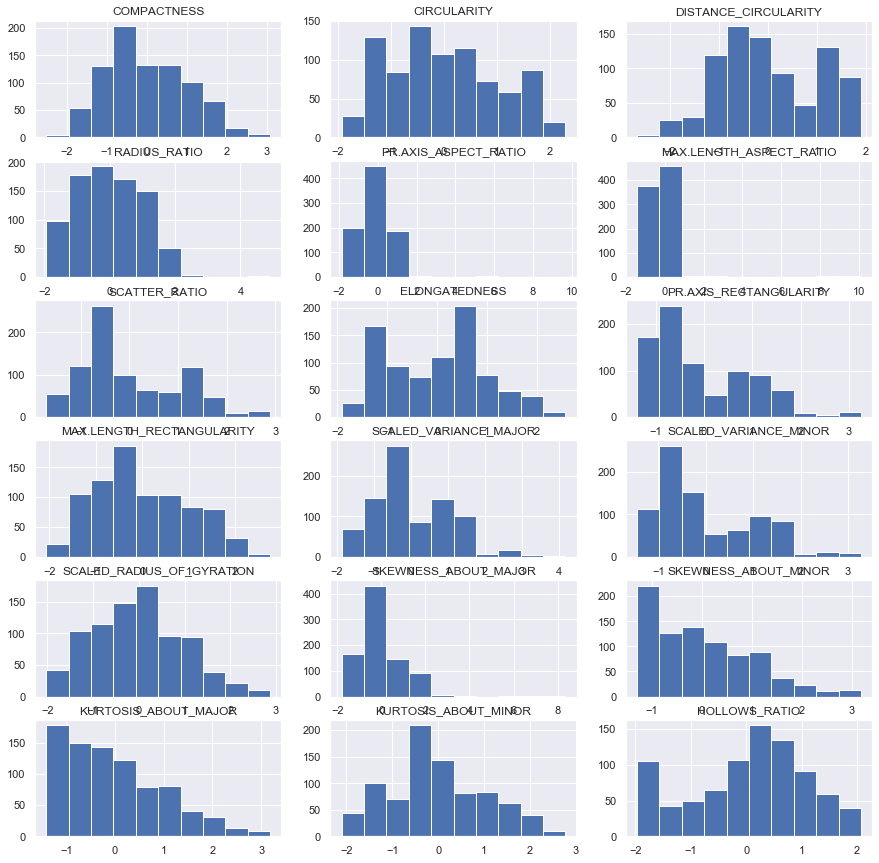

In [14]:
def plot_series(dia_01,row,col,num_of_figs):
    columns=dia_01.columns
    fig, axs = plt.subplots(row,col,figsize=(15,15))
    counter=1
    for i in range(0,row):
        for j in range(0,col):
            if counter>num_of_figs:
                break
            axs[i,j].hist(dia_01.iloc[:,counter-1])
            axs[i,j].set_title(columns[counter-1])
            counter +=1
    plt.show()

plot_series(vehicle_norm,6,3,18)

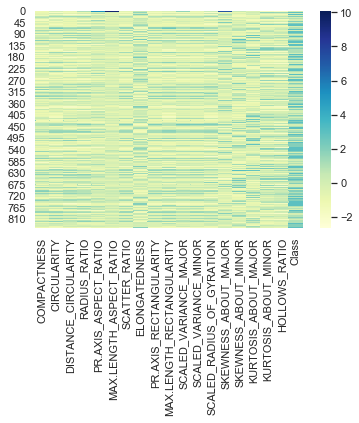

In [15]:
sns.heatmap(vehicle_norm,cmap="YlGnBu")

well its quite impossible to notice anything from that map

In [16]:
vehicle_norm["Class"]=vehicle_norm["Class"].replace({0:"bus", 1:"opel", 2:"saab" , 3:"van"})

In [17]:
h_train,h_test=train_test_split(vehicle_norm,test_size=0.2,random_state=7)

In [18]:
h_train

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
64,-0.082445,0.022428,0.248147,0.958350,0.926754,-0.340845,0.456301,-0.760068,0.547076,-0.206714,0.458139,0.470522,0.255069,-0.061767,-1.297353,-0.963402,0.822585,0.183957,bus
557,-0.933032,-0.788441,-1.020711,-0.924923,-0.341704,-0.993232,-0.958282,1.033208,-0.996965,-1.033897,-0.848580,-0.911224,-0.728722,0.205522,-0.076711,0.156925,-0.476052,-0.757612,saab
222,0.768143,0.833298,-0.069067,0.838777,0.673062,-0.558308,0.516496,-0.888159,0.547076,0.689401,0.553753,0.515825,0.716221,0.205522,-0.076711,-1.299501,1.309574,0.318467,bus
179,-0.568495,-0.139746,-0.766939,-0.954817,-0.468550,-0.558308,-0.988380,1.033208,-0.996965,-0.137782,-0.657353,-0.945201,-0.267570,0.740099,0.737051,-1.075435,-0.476052,-1.161141,van
696,-0.568495,-1.112789,-0.005624,-0.386845,-0.341704,-0.123383,-0.476722,0.264661,-0.610954,-1.309625,-0.306770,-0.503496,-1.159130,-0.329056,-1.093913,-1.299501,-0.313722,-0.488592,saab
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,-1.176057,-1.112789,-1.020711,-0.924923,0.038833,-0.558308,-1.289355,1.673664,-0.996965,-1.102829,-1.422262,-1.177380,-1.097643,-0.329056,-0.483592,-0.627304,-0.638381,-0.757612,opel
502,-0.933032,-1.437137,-1.020711,-1.223856,-0.595396,-0.123383,-1.138868,1.417481,-0.996965,-1.447489,-1.294777,-1.064122,-1.097643,0.472810,-0.280151,1.613351,-0.963041,-1.161141,opel
537,-0.933032,-0.788441,-1.020711,-0.895030,-0.341704,-0.340845,-1.409745,1.673664,-1.382975,-0.620306,-1.390391,-1.217020,-0.974669,-1.264566,0.126729,-0.179173,2.121222,1.663566,van
196,1.618730,1.806342,1.390119,1.855147,1.180446,0.529004,1.509715,-1.272432,1.705106,1.654447,1.191177,1.501169,1.300346,-0.195411,2.568014,-0.179173,0.010937,0.049447,saab


In [19]:
h_test

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
385,0.039068,0.671124,0.311590,-0.297166,0.292525,0.311542,-0.356332,0.264661,-0.224944,0.689401,-0.306770,-0.435541,0.869938,0.339166,-0.483592,-1.411533,-0.963041,-0.219572,van
739,0.282093,-0.139746,0.184704,-0.087913,0.546217,0.311542,-0.416527,0.264661,-0.610954,0.137945,-0.689224,-0.480844,-0.482774,-0.729989,-0.687032,-0.291206,0.497926,0.856507,van
816,-0.446982,0.508950,0.184704,-0.356952,0.292525,0.529004,-0.235942,0.264661,-0.224944,1.309788,-0.434255,-0.367586,0.347299,0.205522,-0.687032,0.380991,-0.638381,-0.085062,van
205,-0.811520,0.346776,-0.069067,-0.596098,0.038833,0.094079,-0.657307,0.520843,-0.610954,0.275809,-0.561740,-0.650731,0.193582,-0.061767,-1.297353,-0.739337,-0.151393,0.318467,van
808,-1.297570,0.184602,-0.893825,-0.895030,-0.341704,-0.558308,-0.567015,0.392752,-0.610954,-0.137782,-0.529868,-0.588439,0.255069,0.205522,-0.280151,-1.075435,-0.638381,-0.623102,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
657,-0.568495,0.022428,0.184704,-0.596098,-0.341704,0.529004,-0.326234,0.264661,-0.224944,0.689401,-0.370512,-0.441204,-0.052366,0.339166,1.143931,0.380991,-0.963041,-0.354082,van
616,-0.203957,-0.464094,-0.830382,-0.476525,-0.468550,-0.123383,-0.867990,0.905117,-0.996965,-0.689238,-0.752967,-0.848932,-0.728722,-1.130922,0.737051,0.941155,1.634233,1.394546,opel
508,0.160580,0.184602,0.628804,-0.297166,0.165679,0.529004,-0.266039,0.136570,-0.224944,0.620469,-0.402383,-0.384575,-0.113853,-0.329056,0.126729,0.941155,0.010937,0.587487,van
614,-1.054545,-1.923659,-2.035797,-1.941293,-1.102779,-0.993232,-1.620428,2.314119,-1.382975,-2.067876,-1.677232,-1.398233,-1.466565,1.408320,-1.093913,1.949450,-1.612359,-1.430161,saab


In [20]:
veh_y_train=h_train["Class"]
veh_y_train.value_counts()

bus     176
saab    175
opel    169
van     156
Name: Class, dtype: int64

In [21]:
veh_x_train=h_train.copy()
veh_x_train=veh_x_train.drop(["Class"],axis=1)
veh_x_train.reset_index()

,index,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,64,-0.082445,0.022428,0.248147,0.958350,0.926754,-0.340845,0.456301,-0.760068,0.547076,-0.206714,0.458139,0.470522,0.255069,-0.061767,-1.297353,-0.963402,0.822585,0.183957
1,557,-0.933032,-0.788441,-1.020711,-0.924923,-0.341704,-0.993232,-0.958282,1.033208,-0.996965,-1.033897,-0.848580,-0.911224,-0.728722,0.205522,-0.076711,0.156925,-0.476052,-0.757612
2,222,0.768143,0.833298,-0.069067,0.838777,0.673062,-0.558308,0.516496,-0.888159,0.547076,0.689401,0.553753,0.515825,0.716221,0.205522,-0.076711,-1.299501,1.309574,0.318467
3,179,-0.568495,-0.139746,-0.766939,-0.954817,-0.468550,-0.558308,-0.988380,1.033208,-0.996965,-0.137782,-0.657353,-0.945201,-0.267570,0.740099,0.737051,-1.075435,-0.476052,-1.161141
4,696,-0.568495,-1.112789,-0.005624,-0.386845,-0.341704,-0.123383,-0.476722,0.264661,-0.610954,-1.309625,-0.306770,-0.503496,-1.159130,-0.329056,-1.093913,-1.299501,-0.313722,-0.488592
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,579,-1.176057,-1.112789,-1.020711,-0.924923,0.038833,-0.558308,-1.289355,1.673664,-0.996965,-1.102829,-1.422262,-1.177380,-1.097643,-0.329056,-0.483592,-0.627304,-0.638381,-0.757612
672,502,-0.933032,-1.437137,-1.020711,-1.223856,-0.595396,-0.123383,-1.138868,1.417481,-0.996965,-1.447489,-1.294777,-1.064122,-1.097643,0.472810,-0.280151,1.613351,-0.963041,-1.161141
673,537,-0.933032,-0.788441,-1.020711,-0.895030,-0.341704,-0.340845,-1.409745,1.673664,-1.382975,-0.620306,-1.390391,-1.217020,-0.974669,-1.264566,0.126729,-0.179173,2.121222,1.663566
674,196,1.618730,1.806342,1.390119,1.855147,1.180446,0.529004,1.509715,-1.272432,1.705106,1.654447,1.191177,1.501169,1.300346,-0.195411,2.568014,-0.179173,0.010937,0.049447


In [22]:
veh_y_test=h_test["Class"]
veh_y_test.value_counts()

opel    43
van     43
saab    42
bus     42
Name: Class, dtype: int64

In [23]:
veh_x_test=h_test.copy()
veh_x_test=veh_x_test.drop(["Class"],axis=1)
veh_x_test.reset_index()

,index,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
0,385,0.039068,0.671124,0.311590,-0.297166,0.292525,0.311542,-0.356332,0.264661,-0.224944,0.689401,-0.306770,-0.435541,0.869938,0.339166,-0.483592,-1.411533,-0.963041,-0.219572
1,739,0.282093,-0.139746,0.184704,-0.087913,0.546217,0.311542,-0.416527,0.264661,-0.610954,0.137945,-0.689224,-0.480844,-0.482774,-0.729989,-0.687032,-0.291206,0.497926,0.856507
2,816,-0.446982,0.508950,0.184704,-0.356952,0.292525,0.529004,-0.235942,0.264661,-0.224944,1.309788,-0.434255,-0.367586,0.347299,0.205522,-0.687032,0.380991,-0.638381,-0.085062
3,205,-0.811520,0.346776,-0.069067,-0.596098,0.038833,0.094079,-0.657307,0.520843,-0.610954,0.275809,-0.561740,-0.650731,0.193582,-0.061767,-1.297353,-0.739337,-0.151393,0.318467
4,808,-1.297570,0.184602,-0.893825,-0.895030,-0.341704,-0.558308,-0.567015,0.392752,-0.610954,-0.137782,-0.529868,-0.588439,0.255069,0.205522,-0.280151,-1.075435,-0.638381,-0.623102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,657,-0.568495,0.022428,0.184704,-0.596098,-0.341704,0.529004,-0.326234,0.264661,-0.224944,0.689401,-0.370512,-0.441204,-0.052366,0.339166,1.143931,0.380991,-0.963041,-0.354082
166,616,-0.203957,-0.464094,-0.830382,-0.476525,-0.468550,-0.123383,-0.867990,0.905117,-0.996965,-0.689238,-0.752967,-0.848932,-0.728722,-1.130922,0.737051,0.941155,1.634233,1.394546
167,508,0.160580,0.184602,0.628804,-0.297166,0.165679,0.529004,-0.266039,0.136570,-0.224944,0.620469,-0.402383,-0.384575,-0.113853,-0.329056,0.126729,0.941155,0.010937,0.587487
168,614,-1.054545,-1.923659,-2.035797,-1.941293,-1.102779,-0.993232,-1.620428,2.314119,-1.382975,-2.067876,-1.677232,-1.398233,-1.466565,1.408320,-1.093913,1.949450,-1.612359,-1.430161


In [24]:
model=DecisionTreeClassifier(criterion="entropy",max_depth=5).fit(veh_x_train,veh_y_train)
model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

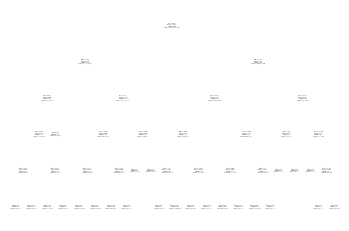

In [25]:
tree.plot_tree(model)
plt.show()

In [26]:
yeh_y_predict=model.predict(veh_x_test)

In [27]:
accuracy_score(veh_y_test,yeh_y_predict)

0.7235294117647059

## max_leaf_node:
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity.
## max_features:
The number of features to consider when looking for the best split.